In [25]:
import cv2
import numpy as np
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
img = cv2.imread('test.jpg')
height, width, channel = img.shape

In [26]:
bgr = img.astype(np.float) / 255.0
b, g, r = cv2.split(bgr)
h = np.zeros((height, width), dtype=np.float)
s = np.zeros((height, width), dtype=np.float)
v = np.max(bgr, axis=2)

In [27]:
for i in range(height): 
    for j in range(width): 
        if v[i][j] == 0: 
            h[i][j] = 0 
            s[i][j] = 0 
        else: 
            min_rgb = min(bgr[i][j]) 
            s[i][j] = 1 - (min_rgb / v[i][j]) 
            if v[i][j] == r[i][j]:
                h[i][j] = 60 * (g[i][j] - b[i][j]) / (v[i][j] - min_rgb) 
            elif v[i][j] == g[i][j]:
                h[i][j] = 120 + (60 * (b[i][j] - r[i][j])) / (v[i][j] - min_rgb) 
            elif v[i][j] == b[i][j]: 
                h[i][j] = 240 + (60 * (r[i][j] - g[i][j])) / (v[i][j] - min_rgb) 
            if h[i][j] < 0: 
                h[i][j] += 360 
            h[i][j] /= 360

In [34]:
hsv = (np.dstack((h, s, v)) * 255).astype(np.uint8)

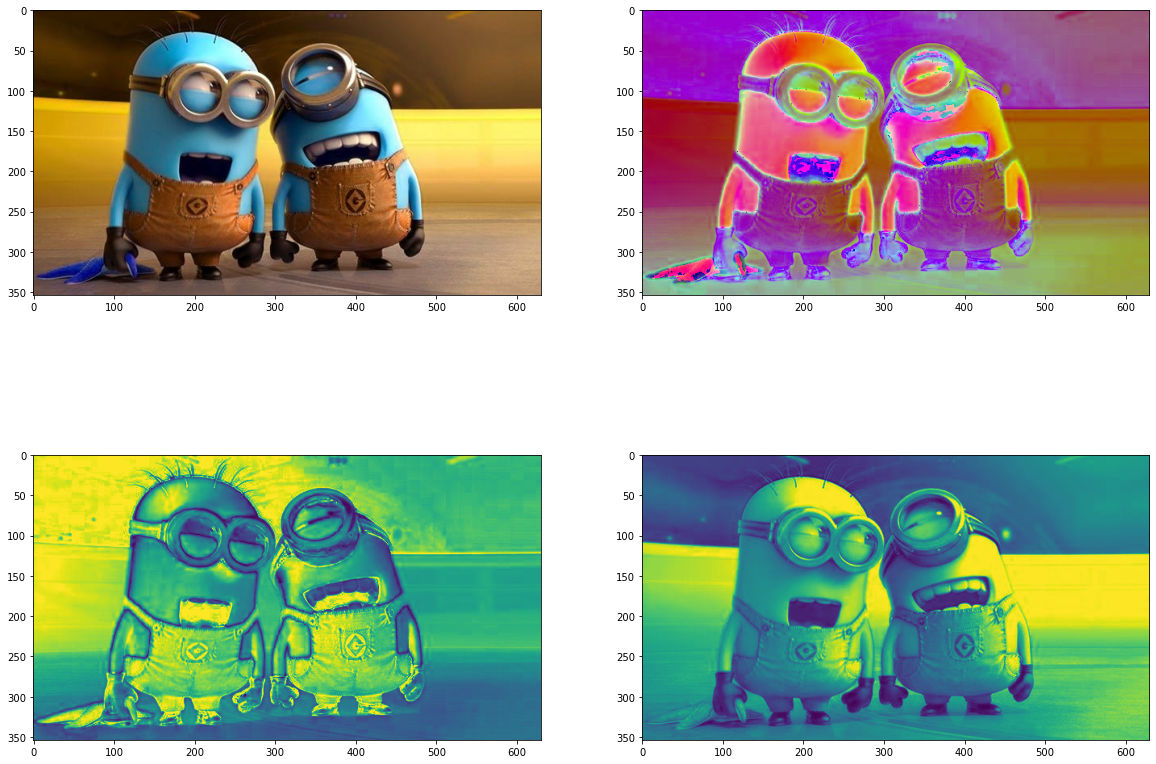

In [35]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
ax[0][0].imshow(img)
ax[0][1].imshow(hsv)
ax[1][0].imshow(s)
ax[1][1].imshow(v)
plt.show()

In [28]:
import cv2
import numpy as np
import argparse
import os
import matplotlib.pyplot as plt

# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Image path to the directory")
# args = vars(ap.parse_args())
# path = args['image']

path = "test.jpg"

# 입력 받은 이미지를 불러옵니다.
src = cv2.imread(path)

# hsv 컬러 형태로 변형합니다.
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
# h(색), s, v로 컬러 영상을 분리 합니다. 
h, s, v = cv2.split(hsv)
# v값을 히스토그램 평활화를 합니다.
equalizedV = cv2.equalizeHist(v)
# h,s,equalizedV를 합쳐서 새로운 hsv 이미지를 만듭니다.
hsv2 = cv2.merge([h,s,equalizedV])
# 마지막으로 hsv2를 다시 BGR 형태로 변경합니다.
hsvDst = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)

# YCrCb 컬러 형태로 변환합니다.
yCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
# y, Cr, Cb로 컬러 영상을 분리 합니다.
y, Cr, Cb = cv2.split(yCrCb)
# y값을 히스토그램 평활화를 합니다.
equalizedY = cv2.equalizeHist(y)
# equalizedY, Cr, Cb를 합쳐서 새로운 yCrCb 이미지를 만듭니다.
yCrCb2 = cv2.merge([equalizedY, Cr, Cb])
# 마지막으로 yCrCb2를 다시 BGR 형태로 변경합니다.
yCrCbDst = cv2.cvtColor(yCrCb2, cv2.COLOR_YCrCb2BGR)

# src, hsv, YCrCb 각각을 출력합니다.
cv2.imshow('src', src)
cv2.imshow('hsv dst', hsvDst)
cv2.imshow('YCrCb dst', yCrCbDst)
cv2.waitKey()
cv2.destroyAllWindows()

In [29]:
# hsv 컬러 형태로 변형합니다.
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# h, s, v로 컬러 영상을 분리 합니다. 
h, s, v = cv2.split(hsv)
# v값을 히스토그램 평활화를 합니다.
equalizedV = cv2.equalizeHist(v)
equalizedS = cv2.equalizeHist(s)
equalizedH = cv2.equalizeHist(h)
# h,s,equalizedV를 합쳐서 새로운 hsv 이미지를 만듭니다.
hsv1 = cv2.merge([h,s,equalizedV])
hsv2 = cv2.merge([h,equalizedS,equalizedV])
hsv3 = cv2.merge([equalizedH,equalizedS,equalizedV])
# 마지막으로 hsv2를 다시 BGR 형태로 변경합니다.
hsvDst1 = cv2.cvtColor(hsv1, cv2.COLOR_HSV2BGR)
hsvDst2 = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
hsvDst3 = cv2.cvtColor(hsv3, cv2.COLOR_HSV2BGR)

In [38]:
a=cv2.hconcat([img, hsvDst1])
b=cv2.hconcat([hsvDst2,hsvDst3])
final=cv2.vconcat([a,b])
cv2.imshow('final dst', final)
cv2.waitKey()
cv2.destroyAllWindows()

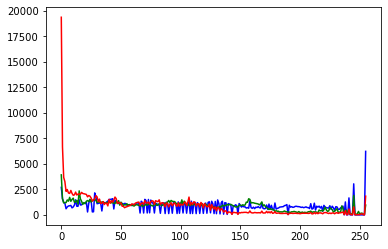

In [31]:
channels = cv2.split(hsvDst1)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.show()

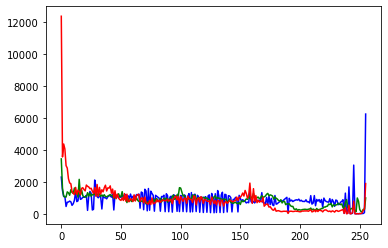

In [32]:
channels = cv2.split(hsvDst2)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.show()

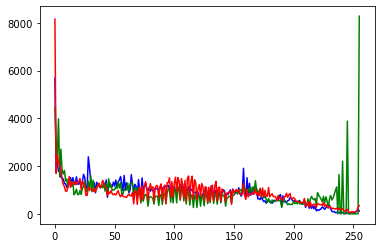

In [33]:
channels = cv2.split(hsvDst3)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.show()